In [1]:
# #Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import pandas_profiling

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import time
import requests
import datetime
import math

import missingno as msno

# #sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn import preprocessing

# #Natural Language Processing
import gensim
from gensim import corpora

c:\users\karti\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
df_input = pd.read_csv(filepath_or_buffer="data/train.tsv", sep="\t", )
df_test = pd.read_csv(filepath_or_buffer="data/test.tsv", sep="\t", )

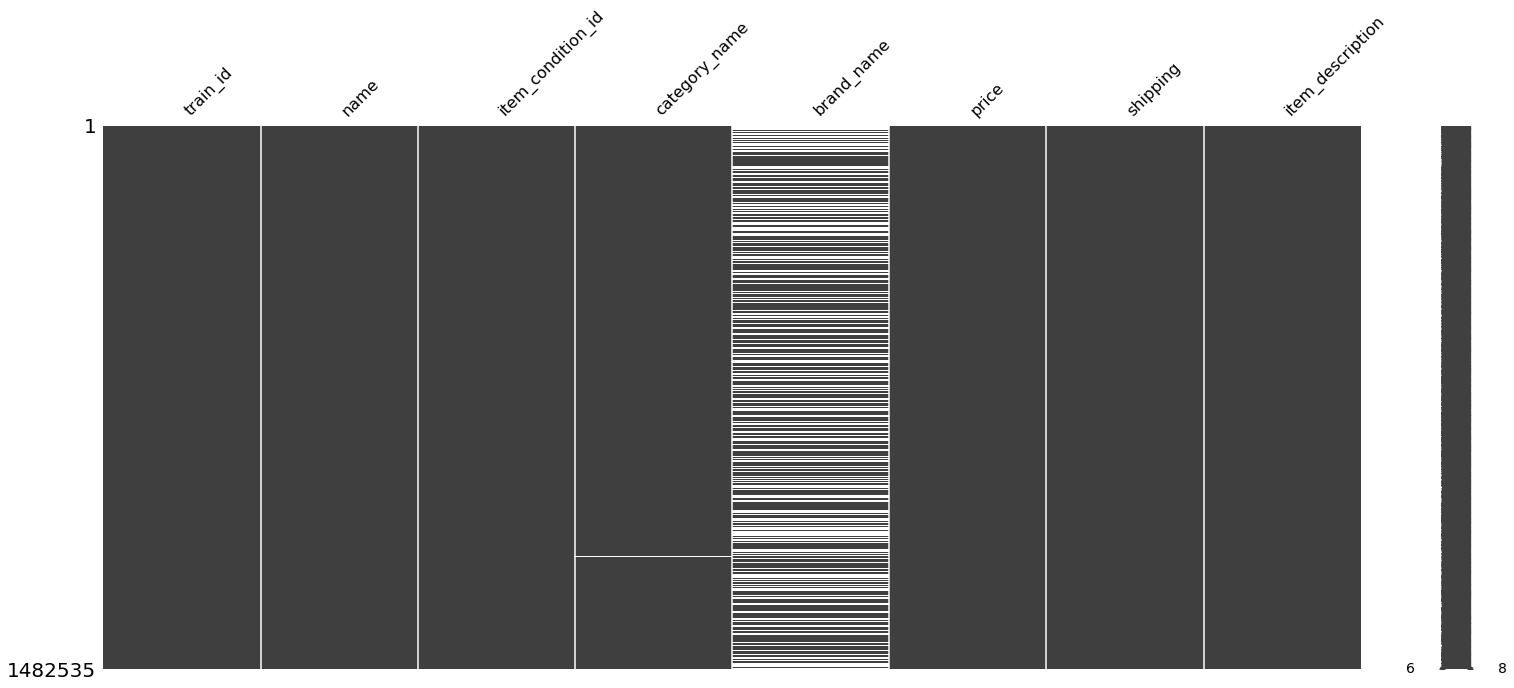

In [5]:
msno.matrix(df_input)

In [37]:
df_input.category_name = df_input.category_name.astype(str)
df_input.brand_name = df_input.brand_name.astype(str)

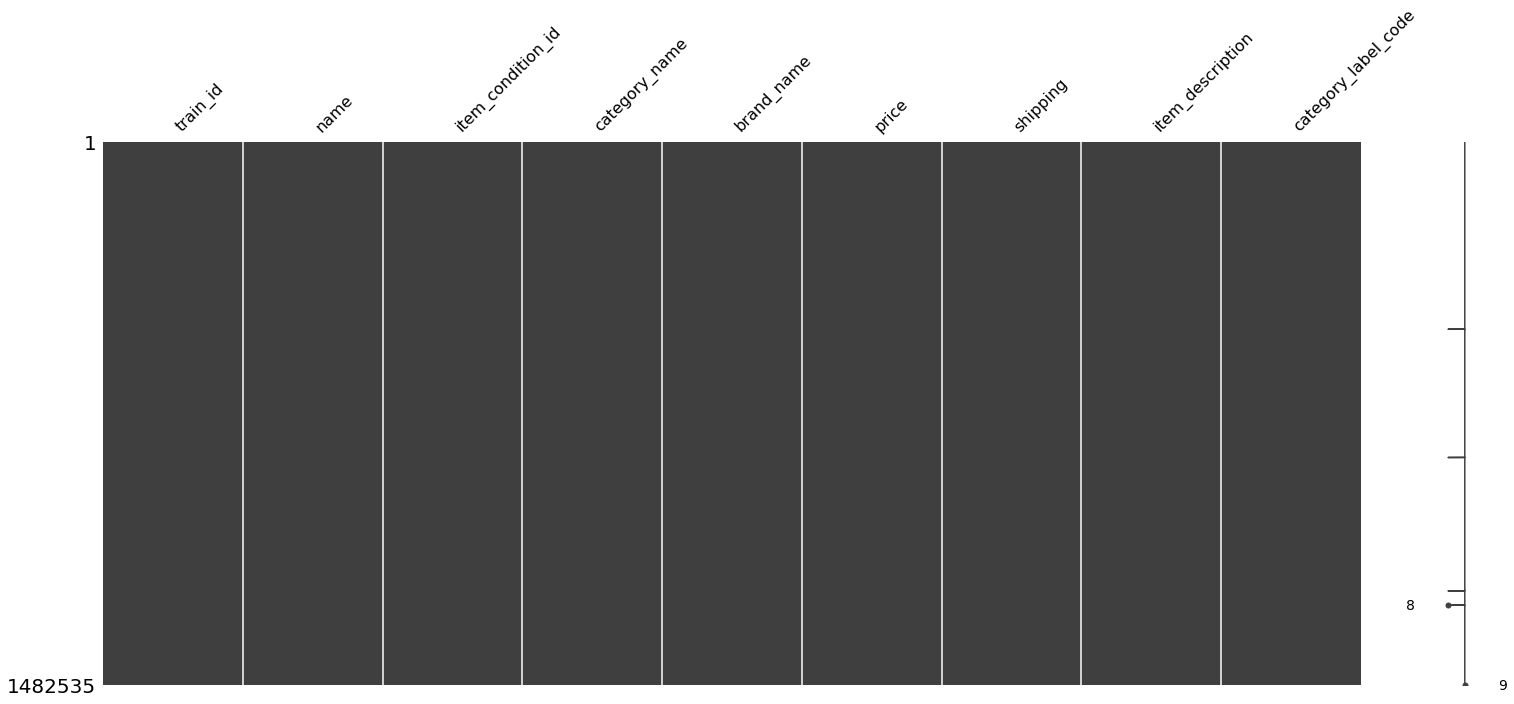

In [38]:
msno.matrix(df_input)

In [39]:
# #Label Encoder

In [43]:
label_encoder_category = preprocessing.LabelEncoder()
label_encoder_brand = preprocessing.LabelEncoder()

label_encoder_category.fit(df_input.category_name.unique())
label_encoder_brand.fit(df_input.brand_name.unique())

LabelEncoder()

In [44]:
label_encoder_category.classes_

array(['Beauty/Bath & Body/Bath', 'Beauty/Bath & Body/Bathing Accessories',
       'Beauty/Bath & Body/Cleansers', ...,
       "Women/Women's Handbags/Shoulder Bag",
       "Women/Women's Handbags/Totes & Shoppers", 'nan'], dtype=object)

In [45]:
label_encoder_brand.classes_

array(['!iT Jeans', '% Pure', '10.Deep', ..., 'triangl swimwear',
       'vineyard vines', 'wallis'], dtype=object)

In [46]:
len(label_encoder_category.classes_)

1288

In [47]:
len(label_encoder_brand.classes_)

4810

In [48]:
# #Transform the Labels
df_input["category_label_code"] = pd.DataFrame(label_encoder_category.transform(df_input["category_name"]))
df_input["brand_label_code"] = pd.DataFrame(label_encoder_brand.transform(df_input["brand_name"]))

In [49]:
len(df_input["category_label_code"].unique())

1288

In [50]:
len(df_input["brand_label_code"].unique())

4810

In [51]:
df_input.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'category_label_code',
       'brand_label_code'],
      dtype='object')

In [52]:
# #Test-Train Split
X = df_input.drop(["price"], axis=1)
y = df_input["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [53]:
print("Train Dataset Shape - X_train: ", X_train.shape)
print("Train Dataset Shape - y_train: ", y_train.shape)
print("--------------------------------")
print("Test Dataset Shape - X_test: ", X_test.shape)
print("Test Dataset Shape - y_test: ", y_test.shape)

Train Dataset Shape - X_train:  (1037774, 9)
Train Dataset Shape - y_train:  (1037774,)
--------------------------------
Test Dataset Shape - X_test:  (444761, 9)
Test Dataset Shape - y_test:  (444761,)


In [54]:
X_train = X_train.drop(["train_id", "name", "category_name", "brand_name", "item_description"], axis = 1)
X_test = X_test.drop(["train_id", "name", "category_name", "brand_name", "item_description"], axis = 1)

In [136]:
model_2 = RandomForestRegressor(max_depth=24, random_state=0, n_jobs=-1)

In [137]:
model_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=24,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [138]:
# 

In [139]:
y_predict = model_2.predict(X_test)

In [140]:
math.sqrt(mean_squared_log_error(y_predict, y_test))

0.5947614349122682

In [141]:
y_predict

array([  8.84250528,  14.8625    ,  15.09385539, ...,   8.33569384,
        39.78772686,  32.17958641])

In [142]:
df_model_2_submission = pd.DataFrame()
df_model_2_submission['test_id'] = df_test['test_id']
df_model_2_submission['price'] = pd.Series(y_predict)
df_model_2_submission.to_csv("submissions/model_2_submission_1.csv", index=False)

In [143]:
!head submissions/model_2_submission_1.csv

test_id,price
0,8.842505282597035
1,14.8625
2,15.09385539047222
3,7.964767987875314
4,20.931470588235296
5,48.40577095025413
6,14.27681818181818
7,17.88108261602911
8,17.91577717514553
